## Assignment 1 - Gaussian MLE With One Outlier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(123)

### Task 1 - Task 1: Bias of the Gaussian Maximum Likelihood Estimator of the Mean

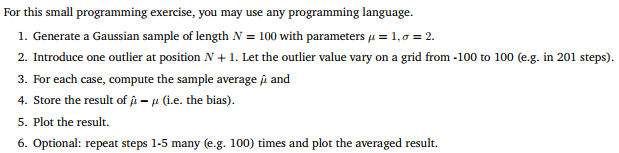

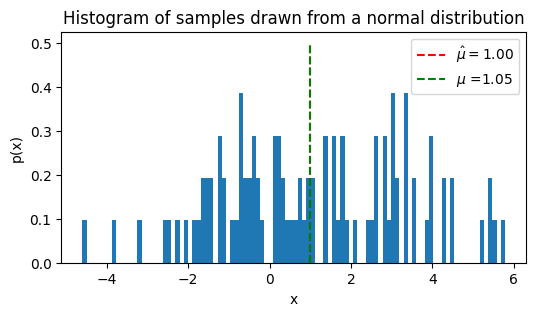

In [3]:
loc = 1
scale = 2
N = 100

samples = np.random.normal(loc, scale, N)
samples_mean = np.mean(samples)

plt.figure(figsize=(6, 3))
plt.hist(samples, bins=100, density=True)
plt.vlines(loc, 0, 0.5, color='red', linestyles="dashed", label='$\hat{\mu} =$' + '{:.2f}'.format(loc))
plt.vlines(loc, 0, 0.5, color='green', linestyles="dashed", label='$\mu$ =' + '{:.2f}'.format(samples_mean))
plt.title('Histogram of samples drawn from a normal distribution')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

In [4]:
print("Samples shape: ", samples.shape)
print(f"Sample Mean: {np.mean(samples):.2f}")

Samples shape:  (100,)
Sample Mean: 1.05


In [5]:
samples_with_outliers = [samples.tolist() + [outlier] for outlier in range(-100, 101)]
samples_with_outliers = pd.DataFrame(samples_with_outliers, columns=[f"sample_{i}" for i in range(N)] + ["outlier"])

In [6]:
samples_with_outliers.head()

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99,outlier
0,-1.171261,2.994691,1.565957,-2.012589,-0.157201,4.302873,-3.853358,0.142175,3.531873,-0.733481,...,-1.534704,1.36207,3.355724,0.329978,3.062229,-1.169136,-1.726943,1.758801,0.241647,-100
1,-1.171261,2.994691,1.565957,-2.012589,-0.157201,4.302873,-3.853358,0.142175,3.531873,-0.733481,...,-1.534704,1.36207,3.355724,0.329978,3.062229,-1.169136,-1.726943,1.758801,0.241647,-99
2,-1.171261,2.994691,1.565957,-2.012589,-0.157201,4.302873,-3.853358,0.142175,3.531873,-0.733481,...,-1.534704,1.36207,3.355724,0.329978,3.062229,-1.169136,-1.726943,1.758801,0.241647,-98
3,-1.171261,2.994691,1.565957,-2.012589,-0.157201,4.302873,-3.853358,0.142175,3.531873,-0.733481,...,-1.534704,1.36207,3.355724,0.329978,3.062229,-1.169136,-1.726943,1.758801,0.241647,-97
4,-1.171261,2.994691,1.565957,-2.012589,-0.157201,4.302873,-3.853358,0.142175,3.531873,-0.733481,...,-1.534704,1.36207,3.355724,0.329978,3.062229,-1.169136,-1.726943,1.758801,0.241647,-96


In [7]:
outliers_s = samples_with_outliers["outlier"]
sample_means_s = samples_with_outliers.mean(axis=1)
sample_means_s.head()

0    0.053681
1    0.063582
2    0.073483
3    0.083384
4    0.093285
dtype: float64

In [8]:
bias_s = loc - sample_means_s

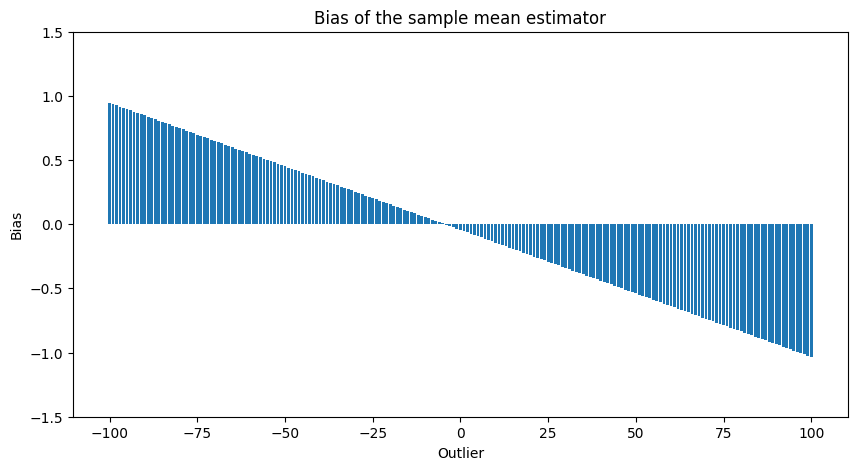

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(samples_with_outliers["outlier"], bias_s)
plt.ylim(-1.5, 1.5)
plt.title('Bias of the sample mean estimator')
plt.xlabel('Outlier')
plt.ylabel('Bias')
plt.show()

In [10]:
abs_bias_s = bias_s.abs()

print("Maximum bias: ", abs_bias_s.max())
print("Outlier for maximum bias: ", outliers_s.iloc[abs_bias_s.idxmax()])

print("Minimum bias: ", abs_bias_s.min())
print("Outlier for minimum bias: ", outliers_s.iloc[abs_bias_s.idxmin()])

Maximum bias:  1.033879353446257
Outlier for maximum bias:  100
Minimum bias:  0.004176383149227192
Outlier for minimum bias:  -4
